# MAYURI MAKARAND BARSHETTY
# DATA SCIENCE TASK1: PREDICTION USING SUPERVISED LEARNING
Predicting the percentage of marks of an student based on the number of study hours using simple linear regression using two variables.

In [1]:
# Importing the Libraries
import numpy as nm  
import matplotlib.pyplot as mtp  
import pandas as pd
import seaborn as sns
%matplotlib inline

# STEP 1: DATA PREPROCESSING

In [2]:
# Read the data from the link
data_set=pd.read_csv('http://bit.ly/w-data')
print("Read the file containing the data")
data_set.head(10)

Read the file containing the data


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
# Shape of the data
data_set.shape

(25, 2)

In [4]:
# Summary of Data
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [5]:
#List our columns 
columns = data_set.columns
columns

Index(['Hours', 'Scores'], dtype='object')

In [6]:
# Statistics that summarize the central tendency, dispersion and shape of a dataset's distribution
data_set.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
# Correlation
data_set.corr(method='pearson')

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


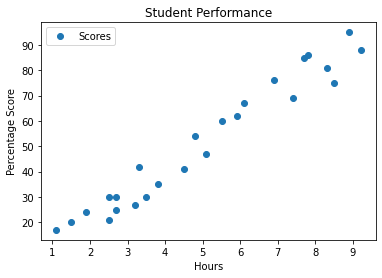

In [8]:
# Plot for Student Performance
data_set.plot(x='Hours', y='Scores', style='o')  
mtp.xlabel('Hours')
mtp.ylabel('Percentage Score')
mtp.title('Student Performance')
mtp.show()

# Data Processing

In [9]:
# Dependent and Independent Variables
x= data_set.iloc[:, :-1].values  
y= data_set.iloc[:, 1].values
df=pd.DataFrame(x,y)
print(df)

      0
21  2.5
47  5.1
27  3.2
75  8.5
30  3.5
20  1.5
88  9.2
60  5.5
81  8.3
25  2.7
85  7.7
62  5.9
41  4.5
42  3.3
17  1.1
95  8.9
30  2.5
24  1.9
67  6.1
69  7.4
30  2.7
54  4.8
35  3.8
76  6.9
86  7.8


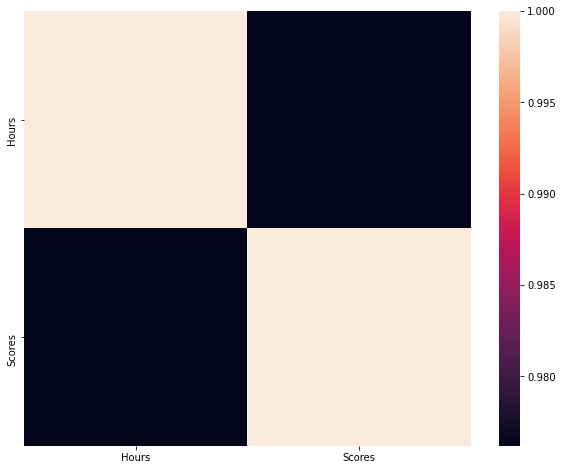

In [10]:
# Heatmap
mtp.subplots(figsize=(10,8))
sns.heatmap(data_set.corr())

# Training the Dataset using Scikit Learn

In [11]:
# Importing train_test_split function from sklearn.model_selection
from sklearn.model_selection import train_test_split
#Creating Train & Test database
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

# Fitting the Simple Linear Regression to the Training Set

In [12]:
#Fitting the Simple Linear Regression model to the training dataset  
from sklearn.linear_model import LinearRegression  
regressor= LinearRegression()  
regressor.fit(x_train, y_train)

LinearRegression()

# Prediction of test set result

In [14]:
#Prediction of Test and Training set result  
y_pred= regressor.predict(x_test)  
x_pred= regressor.predict(x_train)
df=pd.DataFrame(y_pred)
df

,0
0,16.844722
1,33.745575
2,75.500624
3,26.786400
4,60.588106
5,39.710582
6,20.821393


In [15]:
# Comparision between Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


# Visualizing the Training set results

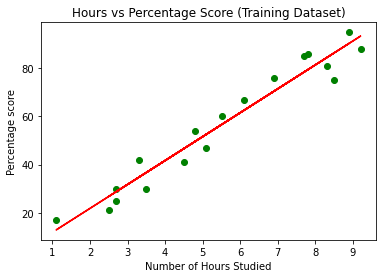

In [16]:
# Training set results
mtp.scatter(x_train, y_train, color="green")   
mtp.plot(x_train, x_pred, color="red")    
mtp.title("Hours vs Percentage Score (Training Dataset)")  
mtp.xlabel("Number of Hours Studied")  
mtp.ylabel("Percentage score")  
mtp.show()

# Visualizing the Test set results

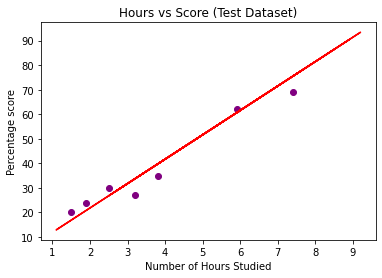

In [17]:
# Visualizing the Test set results  
mtp.scatter(x_test, y_test, color="purple")   
mtp.plot(x_train, x_pred, color="red")    
mtp.title("Hours vs Score (Test Dataset)")  
mtp.xlabel("Number of Hours Studied")  
mtp.ylabel("Percentage score")  
mtp.show()

# Testing Accuracy of the Model

In [18]:
# Accuracy of the model
from sklearn import metrics
metrics.r2_score(y_test,y_pred)

0.9367661043365055

# Predicting the Error

In [19]:
# Predicting the Error
from sklearn import metrics  
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,y_pred)) 
print('Root Mean Squared Error: ',nm.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error:  4.130879918502486
Mean Squared Error:  20.33292367497997
Root Mean Squared Error:  4.5092043283688055


# Predicting the Result for 9.25 hours

In [20]:
# Predicting the Result for 9.25 hours
study_hours=9.25
print("No of hours student studied: ",study_hours)
print("Predicting percentage score: ",regressor.predict(nm.array(study_hours).reshape(1,-1))[0])

No of hours student studied:  9.25
Predicting percentage score:  93.89272889341655
